##  Mesh plotting

In [1]:
import cmocean
import matplotlib.pyplot as plt

from kalpana.export import fort14togdf
from kalpana.plotting import plot_mesh

**The following cell runs fort14togdf() and stores the output as a geodataframe.** <br>

In [2]:
## path of the input fort 14 file
filein = r'../../adds/inputs_examples/fort_gbay.14'

## coordinate system of the fort14 input
epsgIn = 4326

## coordinate system of the output shapefile
epsgOut = 32615

## call fort14togdf() to create a geodataframe object
gdf = fort14togdf(filein, epsgIn, epsgOut, fileintype='fort.14')

In this case as the ```epsgOut``` parameter is a projected crs, the output GeoDataFrame ```gdf``` has the minimum length, a representative length of the element faces (1/3 of perimeter) and the area of each element. When ```epsgOut = 4326``` (lat/lon), these three columns are not included

In [3]:
## display the GeoDataFrame
gdf.head()

,geometry,zmean,centX,centY,v1,v2,v3,id,repLen,minLen,elemArea
0,"POLYGON ((287447.163 3290888.368, 286912.542 3...",5.543243,-95.201730,29.729934,2567.0,2398.0,2399.0,0,616.257,541.513874,157529.564
1,"POLYGON ((309882.008 3238120.143, 309348.508 3...",-1.667927,-94.958507,29.254284,9189.0,9297.0,9298.0,1,704.923,618.809217,207443.024
2,"POLYGON ((332055.579 3227466.011, 332697.680 3...",-16.771819,-94.721000,29.161532,8244.0,8245.0,8107.0,2,1095.052,1028.633308,512084.816
3,"POLYGON ((309002.920 3218238.359, 309032.232 3...",-14.937974,-94.958508,29.073885,10373.0,10433.0,10358.0,3,1177.986,1078.430603,587756.412
4,"POLYGON ((289229.053 3207714.369, 289896.358 3...",-14.198464,-95.156688,28.978091,11613.0,11558.0,11557.0,4,1198.632,1115.915378,617399.553


Plot of mesh element elevation, computed as the average elevation of the three nodes

<AxesSubplot: xlabel='East [m]', ylabel='North [m]'>

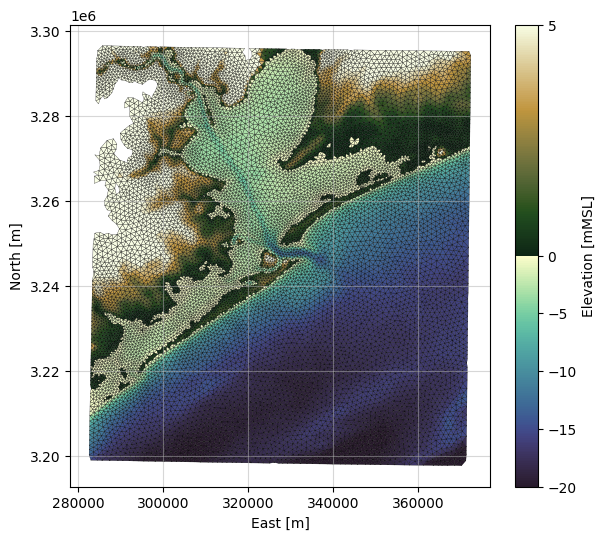

In [6]:
plot_mesh(gdf, background = False, cbar = True, lw = 0.2, cmap = cmocean.cm.topo, vmax = 5, vmin = -20, vcenter = 0, xlabel = 'East [m]', ylabel = 'North [m]')

Plot of mesh elements area

<AxesSubplot: xlabel='East [m]', ylabel='North [m]'>

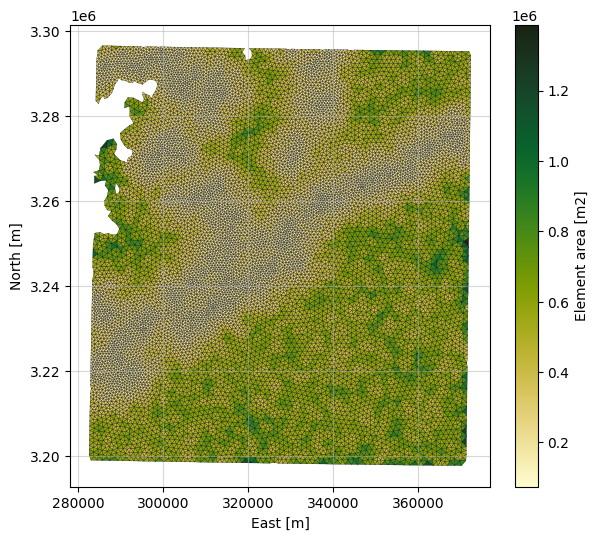

In [8]:
plot_mesh(gdf, var = 'elemArea', background = False, cbar = True, lw = 0.2, cmap = cmocean.cm.speed, xlabel = 'East [m]', ylabel = 'North [m]', 
          cbar_label='Element area [m2]')

Plot of minimum element size

<AxesSubplot: xlabel='East [m]', ylabel='North [m]'>

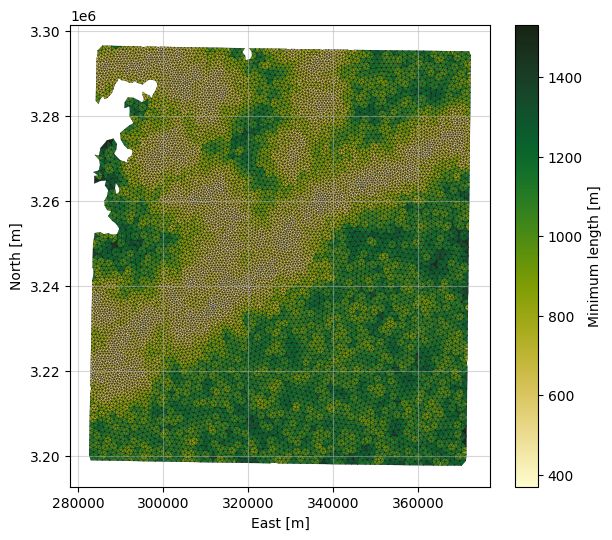

In [9]:
plot_mesh(gdf, var = 'minLen', background = False, cbar = True, lw = 0.2, cmap = cmocean.cm.speed, xlabel = 'East [m]', ylabel = 'North [m]', 
          cbar_label='Minimum length [m]')

Same mesh elevation plot but defining the axis outside the function to have more control of the plot

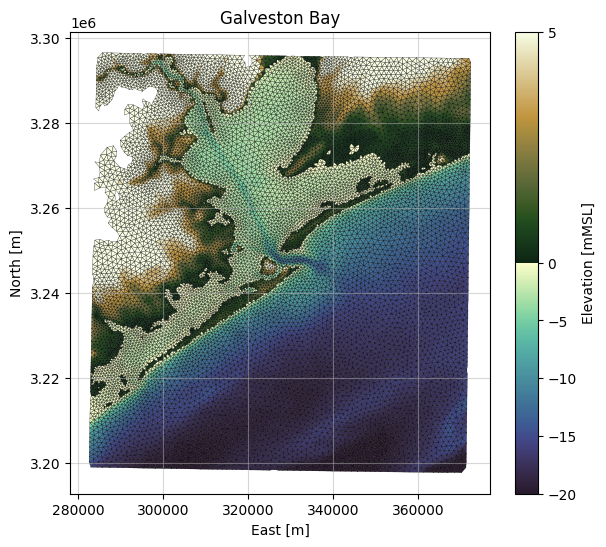

In [16]:
fig, ax = plt.subplots(figsize = (8, 6))
plot_mesh(gdf, background = False, cbar = True, lw = 0.2, cmap = cmocean.cm.topo, vmax = 5, vmin = -20, vcenter = 0, xlabel = 'East [m]', ylabel = 'North [m]',
          ax = ax)
ax.set_title('Galveston Bay')
ax.grid(alpha = 0.5)

Now the mesh gdf is exported using lat/lon so we can use Cartopy to plot a background map

In [9]:
## path of the input fort 14 file
filein = r'../../adds/inputs_examples/fort_gbay.14'

## coordinate system of the fort14 input
epsgIn = 4326

## coordinate system of the output shapefile
epsgOut = 4326

## call fort14togdf() to create a geodataframe object
gdf = fort14togdf(filein, epsgIn, epsgOut, fileintype='fort.14')

In [10]:
gdf.head()

,geometry,zmean,centX,centY,v1,v2,v3,id
0,"POLYGON ((-95.19761 29.72999, -95.20319 29.732...",5.543243,-95.201730,29.729934,2567.0,2398.0,2399.0,0
1,"POLYGON ((-94.95660 29.25766, -94.96204 29.254...",-1.667927,-94.958507,29.254284,9189.0,9297.0,9298.0,1
2,"POLYGON ((-94.72688 29.16469, -94.72013 29.155...",-16.771819,-94.721000,29.161532,8244.0,8245.0,8107.0,2
3,"POLYGON ((-94.96223 29.07819, -94.96174 29.067...",-14.937974,-94.958508,29.073885,10373.0,10433.0,10358.0,3
4,"POLYGON ((-95.16329 28.98015, -95.15627 28.972...",-14.198464,-95.156688,28.978091,11613.0,11558.0,11557.0,4


<GeoAxesSubplot: >

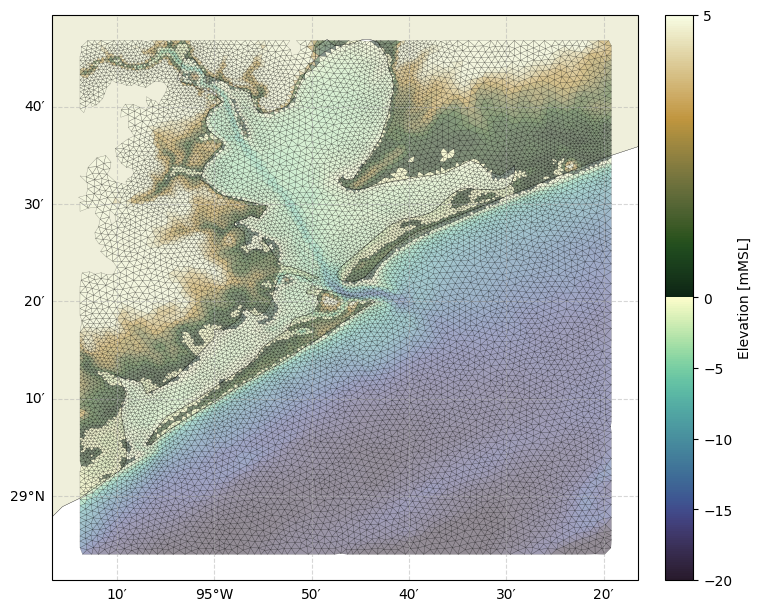

In [11]:
plot_mesh(gdf, background = True, cbar = True, lw = 0.2, cmap = cmocean.cm.topo, vmax = 5, vmin = -20, vcenter = 0, alpha = 0.5)